<a href="https://colab.research.google.com/github/milhamm/restaurant-fuzzy-logic/blob/main/Group_2_Fuzzy_Logic_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fuzzy Logic - Group 2**


1.   Putra Dharma Bangsa
2.   Dzaki Mahadika Gunarto
3.   Muhammad Ilham Mubarak




In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Importing the Restaurant Datasets**


In [51]:
data = pd.read_excel("https://github.com/milhamm/restaurant-fuzzy-logic/blob/main/restoran.xlsx?raw=true")
data

,id,pelayanan,makanan
0,1,58,7
1,2,54,1
2,3,98,2
3,4,52,4
4,5,11,4
...,...,...,...
95,96,30,1
96,97,25,3
97,98,27,10
98,99,8,6


## **Linguistic Variables**


### **Input Linguistic**
Service Quality [0 - 100]:
*   Excellent
*   Okay
*   Bad

Food Quality [0 - 10]:
*   Delicious
*   Okay
*   Less Delicious

### **Output Linguistic**

*   Recommended
*   Average
*   Not Recommended



## **Membership Functions**

In [52]:
def maximum(x, a, b):
  if a < x and x <= b:
    return (x - a) / (b - a)
  if x <= a:
    return 0
  return 1

def minimum(x, a, b):
  if a < x and x <= b:
    return (b - x) / (b - a)
  if x <= a:
    return 1
  return 0

def average(x, a, b, c, d):
  if x <= a or x > d:
    return 0
  if a < x and x < b:
    return (x - a) / (b - a)
  if c < x and x <= d:
    return (d - x) / (d - c)
  return 1

def minimum_service(x):
  s_min_a = 30
  s_min_b = 50
  return minimum(x, s_min_a, s_min_b)

def average_service(x):
  s_avg_a = 45
  s_avg_b = 60
  s_avg_c = 75
  s_avg_d = 80
  return average(x, s_avg_a, s_avg_b, s_avg_c, s_avg_d)

def maximum_service(x):
  s_max_a = 75
  s_max_b = 90
  return maximum(x, s_max_a, s_max_b)

def minimum_food(x):
  f_min_a = 3.5
  f_min_b = 5
  return minimum(x, f_min_a, f_min_b)

def average_food(x):
  f_avg_a = 4.5
  f_avg_b = 5
  f_avg_c = 6.5
  f_avg_d = 7.5
  return average(x, f_avg_a, f_avg_b, f_avg_c, f_avg_d)

def maximum_food(x):
  f_max_a = 7
  f_max_b = 8
  return maximum(x, f_max_a, f_max_b)

## **Service Quality Membership Function**

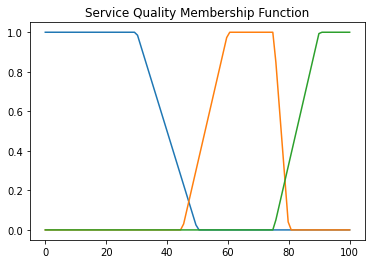

In [53]:
s_x = np.linspace(0, 100, 100)
plt.plot(s_x, [minimum_service(x) for x in s_x])
plt.plot(s_x, [average_service(x) for x in s_x])
plt.plot(s_x, [maximum_service(x) for x in s_x])
plt.title("Service Quality Membership Function")
plt.show()

## **Food Quality Membership Function**

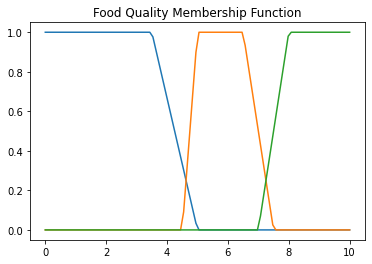

In [54]:
f_x = np.linspace(0, 10, 100)
plt.plot(f_x, [minimum_food(x) for x in f_x])
plt.plot(f_x, [average_food(x) for x in f_x])
plt.plot(f_x, [maximum_food(x) for x in f_x])
plt.title("Food Quality Membership Function")
plt.show()

## **Design Fuzzy Rules**

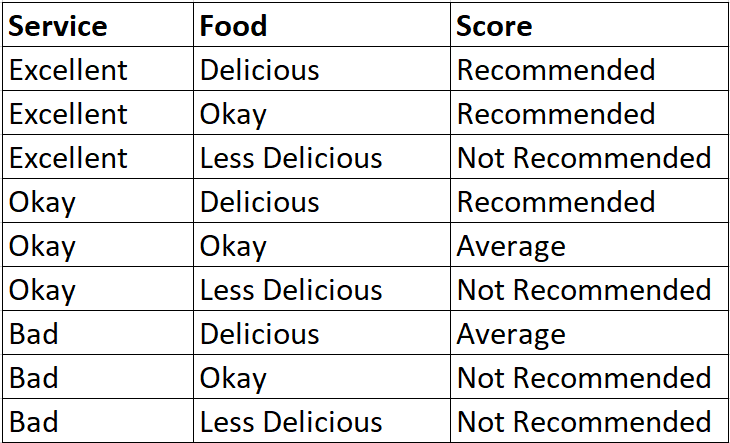

In [55]:
RECOMMENDED = 'recommended'
AVERAGE = 'average'
NOT_RECOMMENDED = 'not_recommended'

fuz = []

for service, food in zip(data["pelayanan"], data["makanan"]):
  fuz.append([
      {
          'name'  : RECOMMENDED,
          'score' : min(maximum_service(service), maximum_food(food))
      },
      {
          'name'  : RECOMMENDED,
          'score' : min(maximum_service(service), average_food(food))
      },
      {
          'name'  : NOT_RECOMMENDED,
          'score' : min(maximum_service(service), minimum_food(food))
      },
      {
          'name'  : RECOMMENDED,
          'score' : min(average_service(service), maximum_food(food))
      },
      {
          'name'  : AVERAGE,
          'score' : min(average_service(service), average_food(food))
      },
      {
          'name'  : NOT_RECOMMENDED,
          'score' : min(average_service(service), minimum_food(food))
      },
      {
          'name'  : AVERAGE,
          'score' : min(minimum_service(service), maximum_food(food))
      },
      {
          'name'  : NOT_RECOMMENDED,
          'score' : min(minimum_service(service), average_food(food))
      },
      {
          'name'  : NOT_RECOMMENDED,
          'score' : min(minimum_service(service), minimum_food(food))
      }
  ])

score = []

for items in fuz:
  maximum_recommended = 0
  maximum_average = 0
  maximum_not_recommended = 0
  
  for item in items:
    if item["name"] == RECOMMENDED:
      maximum_recommended = max(maximum_recommended, item["score"])
    elif item["name"] == AVERAGE:
      maximum_average = max(maximum_average, item["score"])
    else:
      maximum_not_recommended = max(maximum_not_recommended, item["score"])
  
  score.append({
      RECOMMENDED : maximum_recommended,
      AVERAGE : maximum_average,
      NOT_RECOMMENDED : maximum_not_recommended
  })

##**Defuzzification**

In [56]:
def defuzzification(item):
  return ((item[RECOMMENDED] * 100) + (item[AVERAGE] * 70) + (item[NOT_RECOMMENDED] * 50)) / (item[RECOMMENDED] + item[AVERAGE] + item[NOT_RECOMMENDED])

In [61]:
z = [defuzzification(item) for item in score]

data2 = data
data2["score"] = z

data2 = data2.sort_values(by=["score"], ascending=False)

print(data2[0:10])

data2 = data2.drop(["pelayanan", "makanan", "score"], axis=1)
data2[0:10].to_excel("peringkat.xlsx", index=False, header=False)

    id  pelayanan  makanan  score
69  70         78        8  100.0
78  79         87        9  100.0
30  31         74        9  100.0
53  54         64       10  100.0
26  27         59        8  100.0
24  25         61       10  100.0
23  24        100        9  100.0
21  22         79        9  100.0
68  69         86       10  100.0
15  16         82        6  100.0
